<a href="https://colab.research.google.com/github/HatemGamal/ElectroPi/blob/main/OCR_for_National_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
#If you want to know for a specific pip package installation path you can always use
!pip show pytesseract

In [3]:
#If you want to install Arabic for example in Google Colab
#download the file
! wget https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/master/ara.traineddata

--2023-11-07 12:56:14--  https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/master/ara.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12603724 (12M) [application/octet-stream]
Saving to: ‘ara.traineddata’

ara.traineddata     100%[===================>]  12.02M  --.-KB/s    in 0.1s    

2023-11-07 12:56:15 (93.0 MB/s) - ‘ara.traineddata’ saved [12603724/12603724]



In [4]:
#Then move it to Tessdata path
! sudo mv "/content/ara.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata"

In [5]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [6]:
from google.colab import files
uploaded = files.upload()

In [7]:
pytesseract.get_languages(config='')

['ara', 'eng', 'osd']

In [8]:
image_path_in_colab='/sample_data/saudi_id.jpg'
url = 'https://raw.githubusercontent.com/HatemGamal/ElectroPi/c0352b702c6e7264a4ac4c597fc2dee0535e04ab/sample_data/saudi_id.jpg'

In [9]:
import io
import requests
import pytesseract
from PIL import Image

response = requests.get(url)
img = Image.open(io.BytesIO(response.content))

In [10]:
extractedInformation = pytesseract.image_to_string(img)
print(extractedInformation)

duilog) dugg JI * AgogeS! dpe)! AS Lol
Vee 35 Ye ade |All stb

Spall § yluall cle y Gy dgde Go ily

ALANAZI, WAEL JADID R

Be 2

ictal

Ne: 1130648072 VV VEARVES eS
DOB: 24/06/2001 2 \EYY/st/+¥ > sl Ay
DOE: 15/01/2027 a VE EAs A/eV : cl gd! ay

UTA UT UA west ale

1130648072

 



In [11]:
import cv2
import numpy as np
import pandas as pd
import urllib.request

In [12]:
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)

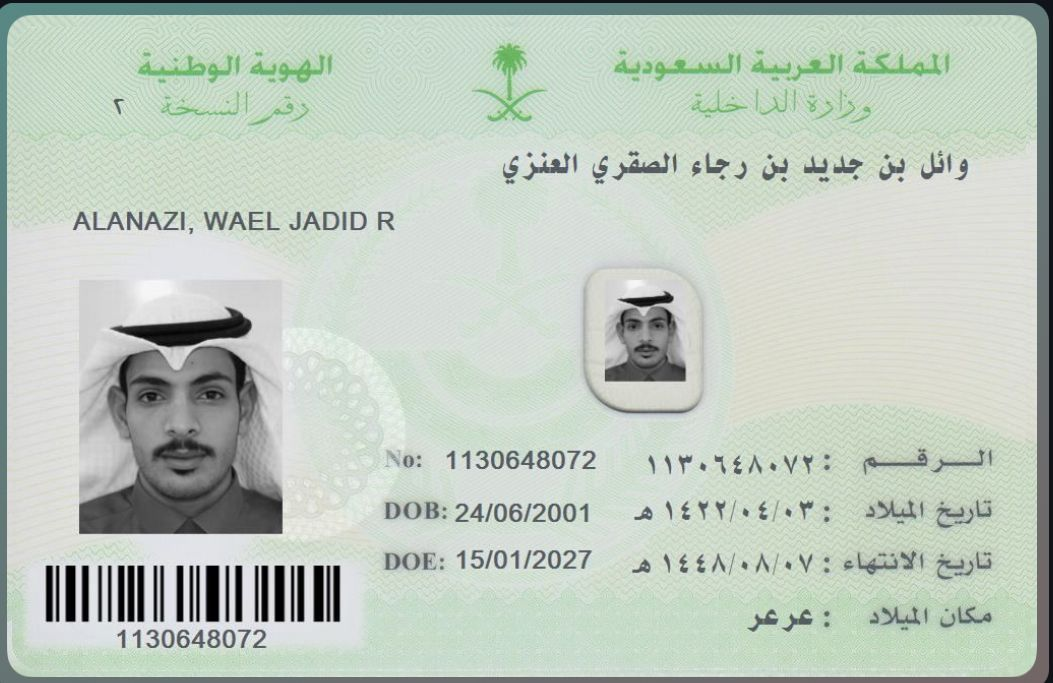

In [13]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [14]:
extractedInformation = pytesseract.image_to_string(img, lang='ara')
print(extractedInformation)

المملكة العربية السعودية 8 الهوبة الوطنية
وراد الداخلية ال د م_السسسبخحة ؟

وائل بن جديد بن رجاء الصقري العنزي

انال لاحلا ,امملاملم

َّ ا

نب

الرقم ‎“٠٠: 1130648072 ٠١“.2/27/27:‏
تاريخ الميلاد : 6/07ف/77؛٠اهم‏ 71 :0ط
تاريخ الانتهاء : ‎١446/0/01‏ هم 15/01/2027 :001

معان اقيلاة ' ع عرعر ااا اناالا

1813<002

 



## **Image Preprocessing**

In [15]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [16]:
import matplotlib.pyplot as plt


(<Axes: >, <matplotlib.image.AxesImage at 0x7a83064c5900>)

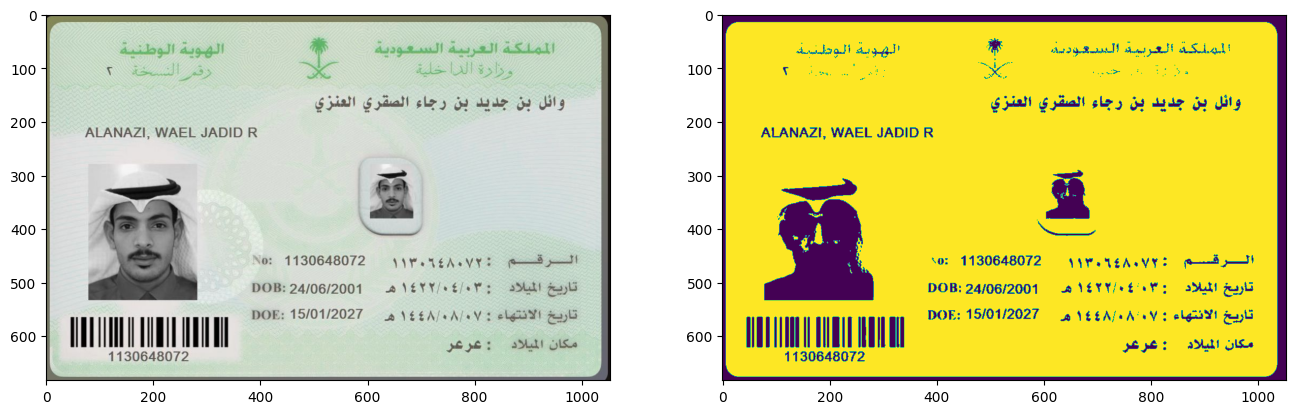

In [17]:
img2 = get_grayscale(img)
img2 = thresholding(img2)
plt.figure(figsize=(16,10))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(img2)


In [18]:
# save extracted information to a dataframe
df = pytesseract.image_to_data(img, lang='ara+eng', output_type='data.frame')
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1053,683,-1,NaN
1,2,1,1,0,0,0,114,43,835,82,-1,NaN
2,3,1,1,1,0,0,114,43,835,82,-1,NaN
3,4,1,1,1,1,0,138,43,811,58,-1,NaN
4,5,1,1,1,1,1,853,51,96,25,91,المملكة
...,...,...,...,...,...,...,...,...,...,...,...,...
77,5,1,8,1,1,1,118,630,148,18,96,1130648072
78,2,1,9,0,0,0,0,0,1053,683,-1,NaN
79,3,1,9,1,0,0,0,0,1053,683,-1,NaN
80,4,1,9,1,1,0,0,0,1053,683,-1,NaN


In [19]:
df2 = pd.DataFrame()

In [27]:
# full name EN
df2['NAME_EN'] = df[(df['block_num']==3) & (df['line_num']==1) ].text.str.cat(sep=' ')

In [28]:
# full name AR
df2['NAME_AR'] = df[(df['block_num']==2) & (df['line_num']==1) ].text.str.cat(sep=' ')

In [22]:
#Id Number
df2['ID_NUM'] = df[(df['block_num']==6) & (df['line_num']==1) & (df['word_num']==3) ].text

In [23]:
#DOB
df2['DOB'] = df[(df['block_num']==6) & (df['line_num']==2) & (df['word_num']==5) ].text.str.cat(sep=' ')

In [24]:
#DOE
df2['DOE'] = df[(df['block_num']==6) & (df['line_num']==3) & (df['word_num']==6) ].text.str.cat(sep=' ')

In [25]:
#مكان الميلاد
df2['BIRTH_LOC'] = df[(df['block_num']==7) & (df['line_num']==1) & (df['word_num']==5) ].text.str.cat(sep=' ')

In [35]:
df2.T

,47
NAME_EN,"ALANAZI, WAEL JADID R"
NAME_AR,وائل بن جديد بن رجاء الصقري العنزي
ID_NUM,1130648072
DOB,24/06/2001
DOE,15/01/2027
BIRTH_LOC,عرعر
